In [1]:
import pandas as pd
import numpy as np
import time
from zipfile import ZipFile
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pptx import Presentation
from xlsxwriter.utility import xl_rowcol_to_cell
from pretty_html_table import build_table
from datetime import date,datetime,timedelta
from babel.numbers import format_currency
from IPython.core.display import HTML
from pyxlsb import open_workbook
from zipfile import ZipFile
import shutil
import os
import glob

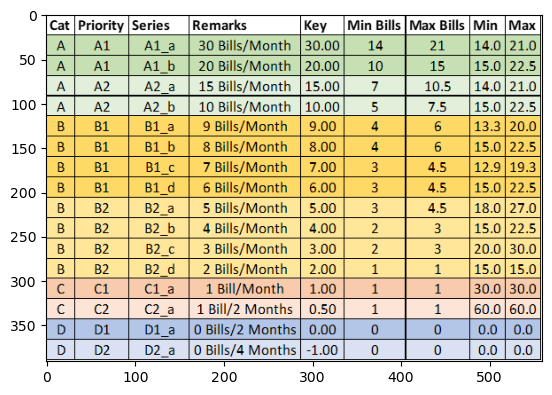

In [2]:
def display_image_1(image_path_1):
    img = mpimg.imread(image_path_1)
    plt.imshow(img)
    plt.axis('on')  
    plt.show()
image_path_1 = "D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\Minmax Logic for Based On 2 months Sales 1.jpg"
display_image_1(image_path_1)

##### All_Master

In [3]:
master_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\abc Pharmacy Raw data\Masters\\"

In [4]:
master_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\abc Pharmacy Raw data\\Masters\\'

In [5]:
gof_pro=pd.read_csv(master_path+'Gof Pro master.csv'
                       ,skiprows = 3,low_memory=False)
gof_pro.drop(gof_pro.index[0],inplace=True)
dyn_pro1=pd.read_csv(master_path+'D365 pro Master 1.csv',low_memory=False)
dyn_pro2=pd.read_csv(master_path+'D365 pro Master 2.csv',low_memory=False)
uni_pro=pd.read_csv(master_path+'Item Unique master.csv',low_memory=False)
mdm_master=pd.read_csv(master_path+'One_MDM_Master.csv',low_memory=False)
stores=pd.read_csv(master_path+'Store Details.csv',low_memory=False)

In [6]:
dyn_pro=pd.concat([dyn_pro1,dyn_pro2])
dyn_pro.reset_index(inplace=True)
dyn_pro.drop("index",axis=1,inplace=True)

In [7]:
dyn_pro.columns

Index(['Item number', 'Product name', 'Search name', 'Item Reference',
       'Composition', 'Product type', 'Product subtype',
       'Product dimension groups', 'Product lifecycle state', 'Chronic Drug',
       'Is generic', 'Manufacturer', 'Mfg Code', 'Marketed By',
       'Is Prescription Required', 'Product Form', 'Schedule Type', 'BOM unit',
       'Dual Use Code', 'Item type', 'Packing group', 'Packing quantity',
       'Production group', 'Production type', 'Search name2', 'Tax rate type',
       'Vendor', 'Modified by', 'Unit', 'Created by', 'Item group',
       'Item model group', 'Created date and time', 'HSN codes', 'MDM Clean 1',
       'IS Purchasse (B)', 'One MDM Code', 'MDM Chcek ', 'Is Sale Blocked',
       'Created Date', 'Mfg Code2', 'Reference', 'MDM CHECK'],
      dtype='object')

In [8]:
sd_track=stores.drop(stores[stores['Store Type']!='Retail'].index)

In [9]:
sd_track['D 365 Store Id']=sd_track['D 365 Store Id'].astype('int64')

In [10]:
uni_pro.rename(columns={'GOF CODE':"Item Code",'MDM Code':"One MDM Code",'Updated Pro Name':"Brand Description"},inplace=True)
uni_pro.columns

Index(['Gof Code', 'Gof Description', 'MDM Code OLD', 'MDM Code Revised',
       'Easy Sol Code', 'Easy Sol Desc', '365 Item code', 'D365 Descxription',
       'IU', 'Choose Tax %', 'Sales Blocked', 'Updated Item Name',
       'Special Form', 'Generic Name', 'Strength', 'Form', 'Category 1',
       'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6 - Brand', 'HSN Codes', 'Long Description', 'Item Code',
       'One MDM Code', 'Gofcode', 'Easysol', 'D365 Cpde', 'Created Date',
       'Created By', 'CTG', 'KOM', 'CTG 8', 'Brand Description', 'Sch CTG',
       'MDM Rework', 'Medplus Code', 'Act Audit Form', 'Form Name'],
      dtype='object')

In [11]:
mdm_master.rename(columns={'MDM Code':"One MDM Code",'Item Description':"Brand Description"},inplace=True)
mdm_master.columns

Index(['System', 'One MDM Code', 'D 365 Code', 'GOF Code', 'Item Group', 'CTG',
       'KOM-D', 'KOM', 'CAT', 'CTG 8', 'IU', 'Item Per Unit',
       'Brand Description', 'IS Pur Blocked', 'Composition'],
      dtype='object')

In [12]:
sd_track.rename(columns={'Store Mapping As Per grofula':"Outlet Name"},inplace=True)
sd_track.columns

Index(['S. No.', 'Store Code', 'Store Type', 'HDH Store Code', 'HPD BU2 ID',
       'HPD TNG', 'Get Well', 'SreeJi', 'Vasu agency', 'Venkat Sai',
       'HPD Kerala', 'PO Store Name', 'Store NameAs per Branding ',
       'Outlet Name', 'GOF Store Id', 'Launch Date', 'Email ID', 'Short Name',
       'Build-up Area in Sft', 'Phone Number', 'Ops Exexutive',
       'Cluster Mail Id', 'Executive Phone Number', 'Area Manager',
       'Sub Region', 'State', 'City', 'City 2', 'Status', 'Manager', 'Cluster',
       'Any Desk ID', 'Rental', 'FF Target', 'Address', 'Zip Code', 'Region',
       'HOO', 'Outlet Format', 'Tenure Days', 'Tenure Month', 'Tenure Years',
       'Tenure', 'Launch Month', 'Launch Year', 'Quarter', 'Financial Year',
       'Securty Deposit', 'Rent Start Date', 'Store System', 'D 365 Store Id',
       'Store Name As per D 365', 'Retail Channel Id', 'Party ID',
       'Fin And Qtr', 'Location Series', 'City G', 'Vendor Code'],
      dtype='object')

In [13]:
sales_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data"

###### HPD Rate List

In [14]:
hps_rate_list_path="D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\ES Sale RD\HPD Rate List"

In [15]:
hps_rate_list_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List'

In [16]:
hps_rate_files = glob.glob(hps_rate_list_path + "/*.csv")

hpd_rate_master = pd.DataFrame()
hpd_rate_content = []

for filename in hps_rate_files:
    dat,c = filename.split(" ")[-2].split("\\")
    df = pd.read_csv(filename, index_col=None, low_memory=False).assign(State=c)
    hpd_rate_content.append(df)

# Concatenate the dataframes in dyn_content
hpd_rate_master = pd.concat(hpd_rate_content)

In [17]:
hpd_rate_master.head(1)

,S.No,Unnamed: 1,Unnamed: 2,COMPANY,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State
0,1,82504,-1,NaN,966737,FEVERIN CC TABLET,10S,12.0,0.0,0.0,0.0,0.0,PHARMA,3-A-AR78-HW-BQ56-XX09-X-00001,KA


In [18]:
hpd_rate_master.reset_index(inplace=True)
hpd_rate_master.drop("index",axis=1,inplace=True)
print(hpd_rate_master.shape)
hpd_rate_master.tail(2)

(252537, 15)


,S.No,Unnamed: 1,Unnamed: 2,COMPANY,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State
252535,84198,41137,2470,ZYPHARS PHARMACEUTICALS PVT LTD,936216,VAZIR 500MG TABLET 3S,3S,12.0,0.0,0.0,0.0,0.0,PHARMA,3-A-AJ61-HW-GK61-BS10-X-00001,TG
252536,84199,86789,4923,ZYQON LIFESCIENCES PRIVATE LIMITED,990566,DZYLIN TABLET 10S,10S,18.0,0.0,0.0,0.0,0.0,PHARMA,3-A-BP36-HW-JL86-XX09-X-00001,TG


In [19]:
hps_rate_files

['D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\KA Ratelist.csv',
 'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\KL Ratelist.csv',
 'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\ES Sale RD\\HPD Rate List\\TG Ratelist.csv']

In [20]:
hpd_rate_master.drop(columns=['S.No', 'Unnamed: 1', 'Unnamed: 2', 'COMPANY'],inplace=True)

In [21]:
hpd_rate_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252537 entries, 0 to 252536
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Code       252537 non-null  object 
 1   Item Name  252537 non-null  object 
 2   PACK       252291 non-null  object 
 3   GST        252537 non-null  float64
 4   S.RATE     252537 non-null  float64
 5   MRP        252537 non-null  float64
 6   Cost       252537 non-null  float64
 7   P.RATE     252537 non-null  float64
 8   ITEMCAT    252537 non-null  object 
 9   ONEMGCODE  252534 non-null  object 
 10  State      252537 non-null  object 
dtypes: float64(5), object(6)
memory usage: 21.2+ MB


In [22]:
hpd_rate_master["ARPL CP(AppX)"]=hpd_rate_master['S.RATE']

In [23]:
hpd_rate_master["ARPL CP(AppX)"] = hpd_rate_master.apply(
    lambda row: row["Cost"] if row["ARPL CP(AppX)"] == 0 else row["ARPL CP(AppX)"],
    axis=1
)

In [24]:
rate_master=hpd_rate_master.drop(hpd_rate_master[hpd_rate_master["ARPL CP(AppX)"]==0].index)

In [25]:
rate_master.reset_index(inplace=True)
rate_master.drop("index",axis=1,inplace=True)
print(rate_master.shape)
rate_master.tail(1)

(58028, 12)


,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State,ARPL CP(AppX)
58027,537723,SUGAR FREE NATURA POWDER 100GM,EA 0,12.0,117.26,150.0,113.84,113.84,FMCG,3-I-D-A1AU-XX09-XX09-01152,TG,117.26


In [26]:
rate_master["ARPL CP Max"]=rate_master["ARPL CP(AppX)"]
rate_master["ARPL CP Min"]=rate_master["ARPL CP(AppX)"]

In [27]:
rate_master[rate_master["ONEMGCODE"]=="3-A-BS20-HW-BF13-BN42-X-00012"]

,Code,Item Name,PACK,GST,S.RATE,MRP,Cost,P.RATE,ITEMCAT,ONEMGCODE,State,ARPL CP(AppX),ARPL CP Max,ARPL CP Min
3628,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,19.67,143.56,16.82,17.70,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,KA,19.67,19.67,19.67
23782,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,19.35,130.51,18.96,19.35,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,KL,19.35,19.35,19.35
43408,1,PANTOSEC 40 MG TABLET,10S TAB,12.0,24.20,143.56,22.00,22.00,PHARMA,3-A-BS20-HW-BF13-BN42-X-00012,TG,24.20,24.20,24.20


In [28]:
arpl_cp=rate_master.pivot_table(index=["ONEMGCODE"],values=["ARPL CP(AppX)","ARPL CP Min","ARPL CP Max"],aggfunc={"ARPL CP(AppX)":"mean","ARPL CP Min":"min","ARPL CP Max":"min"})

In [29]:
arpl_cp.reset_index(inplace=True)
arpl_cp.head()

,ONEMGCODE,ARPL CP Max,ARPL CP Min,ARPL CP(AppX)
0,3-A-AA16-HW-AG53-BD31-X-00001,9999.29,9999.29,9999.29
1,3-A-AA16-HW-FM28-BD31-X-00001,9285.71,9285.71,9285.71
2,3-A-AA16-HW-FM28-XX09-X-00001,9285.71,9285.71,9285.71
3,3-A-AA21-HW-DJ58-XX09-X-00012,160.00,160.00,160.00
4,3-A-AA22-HW-CD23-BJ51-X-00001,68.57,68.57,68.57


In [30]:
arpl_cp[arpl_cp["ONEMGCODE"]=="3-A-BS20-HW-BF13-BN42-X-00012"]

,ONEMGCODE,ARPL CP Max,ARPL CP Min,ARPL CP(AppX)
13131,3-A-BS20-HW-BF13-BN42-X-00012,19.35,19.35,21.073333


######  Dymanics Sales

In [31]:
sales_path

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data'

In [32]:
d365_sales_check=input()

In [33]:
ds_01=pd.read_csv(sales_path+'\D 365 Raw data\Sales Data\Dyn-S-07-2023.csv',low_memory=False)
ds_02=pd.read_csv(sales_path+'\D 365 Raw data\Sales Data\Dyn-S-08-2023.csv',low_memory=False)
ds_03=pd.read_csv(sales_path+'\D 365 Raw data\Sales Data\Dyn-S-09-2023.csv',low_memory=False)

In [34]:
ds_01['Quantity'] = ds_01['Quantity'].astype(str)
ds_02['Quantity'] = ds_02['Quantity'].astype(str)
ds_03['Quantity'] = ds_03['Quantity'].astype(str)

In [35]:
print('01 :',ds_01['Quantity'].dtype,'',
      '02 :',ds_02['Quantity'].dtype,'',
    '03 :',ds_03['Quantity'].dtype)

01 : object  02 : object  03 : object


In [36]:
print('01 :',ds_01.shape,'',
      '02 :',ds_02.shape,'',
     '03 :',ds_03.shape)

01 : (346183, 54)  02 : (357818, 54)  03 : (223816, 54)


In [37]:
dyn_sm=pd.concat([ds_01,ds_02,ds_03])
dyn_sm.reset_index(inplace=True)
print(dyn_sm.shape)
dyn_sm.drop("index",axis=1,inplace=True)
print(dyn_sm.shape)
dyn_sm.head(2)

(927817, 55)
(927817, 54)


,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox34,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,4.675432e+07,2483651.8,2483620.73,170529.91,0,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04
1,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,4.675432e+07,2483651.8,2483620.73,170529.91,0,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04


In [38]:
dyn_sm['TransType'].value_counts()

Sales      925475
Returns      2342
Name: TransType, dtype: int64

In [39]:
dyn_s=dyn_sm.drop(dyn_sm.loc[dyn_sm['TransType']!='Sales'].index)

In [40]:
dyn_s.reset_index(inplace=True)
dyn_s.drop("index",axis=1,inplace=True)
print(dyn_s.shape)
dyn_s.tail(1)

(925475, 54)


,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox34,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70
925474,3201044,KL - Perumanoor Thevara,17-09-2023,23:57:43,Sales,I320104412201369,"Perumanoor, Thevara",AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,29878812.99,1637475.89,1637436.91,42.1,0,4044602.66,873259.39,4917862.05,6784560.67,6784560.67


In [41]:
dyn_s.shape

(925475, 54)

In [42]:
dyn_s.columns

Index(['Storeid', 'StoreName', 'BillDate', 'BillTime', 'TransType', 'BillNo',
       'Salesman', 'OfferId', 'OfferDescription', 'OriginalBillNo',
       'StyleCode1', 'ItemDescription', 'ItemReference', 'DrugType',
       'MANUFACTURER', 'Category', 'SubCategory', 'ItemGroup', 'HSNCode',
       'ChronicName', 'IsGenericName', 'Batch', 'ExpiryDate', 'MRP',
       'Quantity', 'MRPValue', 'Value', 'GSV', 'TaxPercent', 'TaxExemted',
       'SGSTValue', 'CGSTValue', 'IGSTValue', 'CESSValue', 'ItemDiscount',
       'BillDiscount', 'TotalDiscount', 'Cost', 'CostWithTax', 'MarginWithTax',
       'MarginWithoutTax', 'Textbox86', 'Textbox26', 'Textbox87', 'Textbox34',
       'Textbox90', 'Textbox91', 'Textbox92', 'Textbox93', 'Textbox94',
       'Textbox95', 'Textbox97', 'Textbox83', 'Textbox70'],
      dtype='object')

In [43]:
dyn_s.rename(columns={'StyleCode1':"Item number"},inplace=True)
dyn_s=pd.merge(dyn_s,dyn_pro[['Item number','One MDM Code']], on='Item number', how='left')
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox90,Textbox91,Textbox92,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,2483651.8,2483620.73,170529.91,0,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04,3-A-CC52-AO-EL84-BM81-X-00001


In [44]:
dyn_s[['DD','MM','YYY']]= dyn_s['BillDate'].str.split("-",expand=True)
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox93,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,0,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04,3-A-CC52-AO-EL84-BM81-X-00001,01,07,2023


In [45]:
dyn_s['Billdate']=dyn_s['MM'].map(str)+"/"+dyn_s['DD'].map(str)+"/"+dyn_s['YYY']
#dyn_s['MM+YY']=dyn_s['YYY'].map(str)+"-"+dyn_s['MM']
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04,3-A-CC52-AO-EL84-BM81-X-00001,01,07,2023,07/01/2023


In [46]:
dyn_s['Billdate'] = dyn_s['Billdate'].astype('datetime64[ns]')
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox94,Textbox95,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,6.058805e+06,1167660.99,7.226466e+06,10605278.04,10605278.04,3-A-CC52-AO-EL84-BM81-X-00001,01,07,2023,2023-07-01


In [47]:
dyn_s['Quantity'] = dyn_s['Quantity'].str.replace(',','').astype(float)
dyn_s['MRPValue'] = dyn_s['MRPValue'].str.replace(',','').astype(float)
dyn_s['GSV'] = dyn_s['GSV'].str.replace(',','').astype(float)

In [48]:
dyn_s.loc[dyn_s['GSV'] == 0, 'Free Qty'] = dyn_s['Quantity']
dyn_s.loc[dyn_s['GSV'] != 0, 'Sold Qty'] = dyn_s['Quantity']

In [49]:
dyn_s.loc[dyn_s['Free Qty'] < 0, 'Free Qty'] = 0

In [50]:
dyn_s['Free Qty'].fillna(0,inplace=True)
dyn_s.head(1)

,Storeid,StoreName,BillDate,BillTime,TransType,BillNo,Salesman,OfferId,OfferDescription,OriginalBillNo,...,Textbox97,Textbox83,Textbox70,One MDM Code,DD,MM,YYY,Billdate,Free Qty,Sold Qty
0,3201032,"KL - UC College Junction, Aluva",01-07-2023,0:00:30,Sales,I320103212204505,Cyril Elias,AD-000047,"KL-Buy Pharma get 10%,Buy FMCG get 5%,Buy Baby...",NaN,...,7.226466e+06,10605278.04,10605278.04,3-A-CC52-AO-EL84-BM81-X-00001,01,07,2023,2023-07-01,0.0,30.0


In [51]:
dyn_s['Free Qty'].dtype

dtype('float64')

In [52]:
dyn_rpt=dyn_s.pivot_table(index=['Storeid','One MDM Code','BillDate','Billdate','BillNo'],values=['Sold Qty','Free Qty','MRPValue','GSV'],aggfunc='sum')
dyn_rpt.reset_index(inplace=True)
dyn_rpt.rename(columns={'Storeid':"D 365 Store Id",'MRPValue':"Net sale",'BillDate':"Bill Date",'BillNo':"Bill No.",'GSV':"Net Sales Less Disc"},inplace=True)
print(dyn_rpt.shape)
dyn_rpt.head()

(874497, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net Sales Less Disc,Net sale,Sold Qty
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,18-07-2023,2023-07-18,I290100112204634,0.0,2491.2,3114.0,180.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,04-07-2023,2023-07-04,I290100112204013,0.0,226.8,252.0,10.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,03-08-2023,2023-08-03,I290100112205398,0.0,114.3,127.0,1.0
3,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,12-09-2023,2023-09-12,I290100112207411,0.0,124.2,138.0,1.0
4,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,15-09-2023,2023-09-15,I290100112207528,0.0,124.2,138.0,1.0


###### Gofrugal Sales

In [53]:
gofsalescheck=input()

In [54]:
gs_01 =pd.read_csv(sales_path+'\Gofrugal Raw Data\Sales Data\MW\Gof-BW-IW-07-2023.csv',low_memory=False)
gs_02 =pd.read_csv(sales_path+'\Gofrugal Raw Data\Sales Data\MW\Gof-BW-IW-08-2023.csv',low_memory=False)
gs_03 =pd.read_csv(sales_path+'\Gofrugal Raw Data\Sales Data\MW\Gof-BW-IW-09-2023.csv',low_memory=False)

In [55]:
gs_01['Qty'] = gs_01['Qty'].astype(str)
gs_02['Qty'] = gs_02['Qty'].astype(str)
gs_03['Qty'] = gs_03['Qty'].astype(str)

In [56]:
print('01 :',gs_01['Qty'].dtype,'',
      '02 :',gs_02['Qty'].dtype,'',
      '03 :',gs_03['Qty'].dtype)
print('01 :',gs_01['Free Qty'].dtype,'',
      '02 :',gs_02['Free Qty'].dtype,'',
      '03 :',gs_03['Free Qty'].dtype)

01 : object  02 : object  03 : object
01 : int64  02 : int64  03 : int64


In [57]:
gof_sm = pd.concat([gs_01,gs_02,gs_03])
gof_sm.reset_index(inplace=True)
print(gof_sm.shape)
gof_sm.drop('index',axis=1,inplace=True)
print(gof_sm.shape)
gof_sm.tail(1)

(735001, 31)
(735001, 30)


,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Net Sales (Without Vat),Net Cost (With Vat),VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate
735000,TG - Yousufguda Check Post,WL16543,16-09-2023,208026,RANTAC 150 TAB,,8309803642,,8309803642,,...,36,33.3,3.6,29.7,6.3,7.02,17.49,1.11,44.8,1.49


In [58]:
gof_sm['Qty'] = gof_sm['Qty'].str.replace(',','').astype(float)

In [59]:
gof_sm.loc[gof_sm['Qty'] < 0, 'TransType'] = 'Return'
gof_sm.loc[gof_sm['Qty'] >= 0, 'TransType'] = 'Sales'

In [60]:
c_sum=gof_sm.pivot_table(index=['TransType'],values=['Outlet Name'],aggfunc='count',margins=True)
c_sum.reset_index(inplace=True)
c_sum.head()

,TransType,Outlet Name
0,Return,2271
1,Sales,732730
2,All,735001


In [61]:
gof_s=gof_sm.drop(gof_sm.loc[gof_sm['TransType']!='Sales'].index)

In [62]:
print(gof_s.shape)
gof_s.reset_index(inplace=True)
print(gof_s.shape)
gof_s.drop('index',axis=1,inplace=True)
gof_s.tail(2)

(732730, 31)
(732730, 32)


,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Net Cost (With Vat),VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType
732728,TG - Yousufguda Check Post,WL16543,16-09-2023,107006,PAN D,,8309803642,,8309803642,,...,120.96,12.96,108,26.99,30.22,19.99,10.08,210,14,Sales
732729,TG - Yousufguda Check Post,WL16543,16-09-2023,208026,RANTAC 150 TAB,,8309803642,,8309803642,,...,33.3,3.6,29.7,6.3,7.02,17.49,1.11,44.8,1.49,Sales


In [63]:
uni_pro.columns

Index(['Gof Code', 'Gof Description', 'MDM Code OLD', 'MDM Code Revised',
       'Easy Sol Code', 'Easy Sol Desc', '365 Item code', 'D365 Descxription',
       'IU', 'Choose Tax %', 'Sales Blocked', 'Updated Item Name',
       'Special Form', 'Generic Name', 'Strength', 'Form', 'Category 1',
       'Category 2', 'Category 3', 'Category 4', 'Category 5',
       'Category 6 - Brand', 'HSN Codes', 'Long Description', 'Item Code',
       'One MDM Code', 'Gofcode', 'Easysol', 'D365 Cpde', 'Created Date',
       'Created By', 'CTG', 'KOM', 'CTG 8', 'Brand Description', 'Sch CTG',
       'MDM Rework', 'Medplus Code', 'Act Audit Form', 'Form Name'],
      dtype='object')

In [64]:
gof_s= pd.merge(gof_s,uni_pro[['Item Code','One MDM Code']],on='Item Code',how='left')
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,VatAmt (Purchase),Net Cost (Without Vat),Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType,One MDM Code
0,AP - Currency Nagar,CA2761,01-07-2023,535703,PREGA NEWS 1S,,6372614638,,6372614638,,...,4.64,38.63,14.94,16.72,27.88,43.27,60,60,Sales,3-C-AN2-DA1-DG83-XX09-00002


In [65]:
gof_s=pd.merge(gof_s,sd_track[['Outlet Name','D 365 Store Id','Status']],on='Outlet Name',how='left')
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,Margin On NS(WOT Vat),Margin On NS(With Vat),Margin%,Landing Cost,MRP,Item Rate,TransType,One MDM Code,D 365 Store Id,Status
0,AP - Currency Nagar,CA2761,01-07-2023,535703,PREGA NEWS 1S,,6372614638,,6372614638,,...,14.94,16.72,27.88,43.27,60,60,Sales,3-C-AN2-DA1-DG83-XX09-00002,3701001,In-Active


In [66]:
print(gof_s.shape)

(732730, 34)


In [67]:
gof_s[['DD','MM','YYY']]=gof_s['Bill Date'].str.split('-',expand=True)

In [68]:
gof_s['Billdate']=gof_s['MM'].map(str)+"/"+gof_s['DD'].map(str)+"/"+gof_s['YYY']
#gof_s['MM+YY']=gof_s['YYY'].map(str)+"-"+gof_s['MM']

In [69]:
gof_s['Billdate'] = gof_s['Billdate'].astype('datetime64[ns]')

In [70]:
gof_s.head(1)

,Outlet Name,Bill No.,Bill Date,Item Code,Item Name,Phone1,Mobile Number & SMS alerts,Mobile2,Telephone,CUST GST NO,...,MRP,Item Rate,TransType,One MDM Code,D 365 Store Id,Status,DD,MM,YYY,Billdate
0,AP - Currency Nagar,CA2761,01-07-2023,535703,PREGA NEWS 1S,,6372614638,,6372614638,,...,60,60,Sales,3-C-AN2-DA1-DG83-XX09-00002,3701001,In-Active,01,07,2023,2023-07-01


In [71]:
gof_s.columns

Index(['Outlet Name', 'Bill No.', 'Bill Date', 'Item Code', 'Item Name',
       'Phone1', 'Mobile Number & SMS alerts', 'Mobile2', 'Telephone',
       'CUST GST NO', 'HSN SAC CODE', 'Qty', 'Free Qty',
       'Net Sales (With Vat)', 'Item Discount', 'Bill Discount',
       'Scheme Discount', 'Offer Discount', 'Net Sales Less Disc',
       'VatAmt (Sales)', 'Net Sales (Without Vat)', 'Net Cost (With Vat)',
       'VatAmt (Purchase)', 'Net Cost (Without Vat)', 'Margin On NS(WOT Vat)',
       'Margin On NS(With Vat)', 'Margin%', 'Landing Cost', 'MRP', 'Item Rate',
       'TransType', 'One MDM Code', 'D 365 Store Id', 'Status', 'DD', 'MM',
       'YYY', 'Billdate'],
      dtype='object')

In [72]:
#gof_s['Qty'] = gof_s['Qty'].str.replace(',','').astype(float)
gof_s['Net Sales Less Disc'] = gof_s['Net Sales Less Disc'].str.replace(',','').astype(float)
gof_s['Net Sales (With Vat)'] = gof_s['Net Sales (With Vat)'].str.replace(',','').astype(float)

In [73]:
gof_rpt=gof_s.pivot_table(index=['D 365 Store Id',
                                         'One MDM Code','Bill Date','Billdate','Bill No.'],values=['Qty','Net Sales (With Vat)','Free Qty','Net Sales Less Disc'],aggfunc='sum')
gof_rpt.reset_index(inplace=True)
gof_rpt.rename(columns={'Qty':"Sold Qty",'Net Sales (With Vat)':"Net sale"},inplace=True)
print(gof_rpt.shape)
gof_rpt.head()

(731783, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
0,3201005,3-A-AA23-HW-AS45-BE05-X-00001,06-08-2023,2023-08-06,CC8045,0,282.0,253.77,30.0
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0,282.0,253.77,30.0
2,3201005,3-A-AA23-HW-AS45-BE05-X-00001,12-07-2023,2023-07-12,WL6273,0,846.0,719.10,90.0
3,3201005,3-A-AA23-HW-AS45-BE05-X-00001,19-08-2023,2023-08-19,WL8956,0,846.0,719.10,90.0
4,3201005,3-A-AA23-HW-AS45-BE05-X-00001,21-07-2023,2023-07-21,CC6852,0,912.0,820.72,100.0


###### Consolidating Gofrugal and Dynamice Sales

In [74]:
print('Gofrugal :',gof_rpt.shape,'','Dynamics :',dyn_rpt.shape)
gof_dyn_s_merge = pd.concat([gof_rpt,dyn_rpt])
print(gof_dyn_s_merge.shape)
gof_dyn_s_merge.tail(3)

Gofrugal : (731783, 9)  Dynamics : (874497, 9)
(1606280, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
874494,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200057,0.0,24.0,22.80,8.0
874495,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200075,0.0,12.0,12.00,4.0
874496,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0


In [75]:
gof_dyn_s_merge.reset_index(inplace=True)
gof_dyn_s_merge.drop("index",axis=1,inplace=True)
gof_dyn_s_merge.tail(5)

,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
1606275,3601060,3-K-BM6-XX-AK71-XX09-00001,07-09-2023,2023-09-07,I360106012200025,0.0,170.0,85.00,1.0
1606276,3601060,3-K-BM6-XX-AK71-XX09-00004,08-09-2023,2023-09-08,I360106012200114,0.0,550.0,275.00,1.0
1606277,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200057,0.0,24.0,22.80,8.0
1606278,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200075,0.0,12.0,12.00,4.0
1606279,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0


In [76]:
gof_dyn_s_merge[gof_dyn_s_merge['Sold Qty']>0].count()

D 365 Store Id         1587961
One MDM Code           1587961
Bill Date              1587961
Billdate               1587961
Bill No.               1587961
Free Qty               1587961
Net sale               1587961
Net Sales Less Disc    1587961
Sold Qty               1587961
dtype: int64

In [77]:
print(gof_dyn_s_merge.shape)
merg_sales_rpt=gof_dyn_s_merge.drop(gof_dyn_s_merge[gof_dyn_s_merge['Sold Qty']==0].index)
print(merg_sales_rpt.shape)

(1606280, 9)
(1587961, 9)


In [78]:
merg_sales_rpt.reset_index(inplace=True)
merg_sales_rpt.drop("index",axis=1,inplace=True)
print(merg_sales_rpt.shape)
merg_sales_rpt.tail()

(1587961, 9)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty
1587956,3601060,3-K-BM6-XX-AK71-XX09-00001,07-09-2023,2023-09-07,I360106012200025,0.0,170.0,85.00,1.0
1587957,3601060,3-K-BM6-XX-AK71-XX09-00004,08-09-2023,2023-09-08,I360106012200114,0.0,550.0,275.00,1.0
1587958,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200057,0.0,24.0,22.80,8.0
1587959,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200075,0.0,12.0,12.00,4.0
1587960,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0


In [79]:
merg_sales_rpt[['DD','MM','YYY']]= merg_sales_rpt['Bill Date'].str.split("-",expand=True)
merg_sales_rpt['MM+YY']=merg_sales_rpt['YYY'].map(str)+"-"+merg_sales_rpt['MM']
merg_sales_rpt.head()

,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,DD,MM,YYY,MM+YY
0,3201005,3-A-AA23-HW-AS45-BE05-X-00001,06-08-2023,2023-08-06,CC8045,0.0,282.0,253.77,30.0,06,08,2023,2023-08
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,282.0,253.77,30.0,08,09,2023,2023-09
2,3201005,3-A-AA23-HW-AS45-BE05-X-00001,12-07-2023,2023-07-12,WL6273,0.0,846.0,719.10,90.0,12,07,2023,2023-07
3,3201005,3-A-AA23-HW-AS45-BE05-X-00001,19-08-2023,2023-08-19,WL8956,0.0,846.0,719.10,90.0,19,08,2023,2023-08
4,3201005,3-A-AA23-HW-AS45-BE05-X-00001,21-07-2023,2023-07-21,CC6852,0.0,912.0,820.72,100.0,21,07,2023,2023-07


In [80]:
merg_sales_rpt.drop(columns=["DD","MM","YYY"],inplace=True)

In [81]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail(2)

(1587961, 10)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY
1587959,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200075,0.0,12.0,12.00,4.0,2023-09
1587960,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0,2023-09


In [82]:
merg_sales_rpt["MM+YY"].value_counts()

2023-08    631425
2023-07    621159
2023-09    335377
Name: MM+YY, dtype: int64

In [83]:
merg_sales_rpt["MM+YY"].dtypes

dtype('O')

In [84]:
month_number=pd.DataFrame(merg_sales_rpt["MM+YY"].unique())
month_number.rename(columns={0:"MM+YY"},inplace=True)
month_number.sort_values(by="MM+YY", ascending=True, inplace=True)
month_number.reset_index(inplace=True)
month_number.drop("index",axis=1,inplace=True)

In [85]:
month_number['Month_N'] = month_number.index + 1
month_number

,MM+YY,Month_N
0,2023-07,1
1,2023-08,2
2,2023-09,3


In [86]:
merg_sales_rpt=pd.merge(merg_sales_rpt,month_number[["MM+YY","Month_N"]],on="MM+YY",how="left")

In [87]:
merg_sales_rpt["Month_N"].value_counts()

2    631425
1    621159
3    335377
Name: Month_N, dtype: int64

In [88]:
print(merg_sales_rpt.shape)
merg_sales_rpt.head(2)

(1587961, 11)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,Month_N
0,3201005,3-A-AA23-HW-AS45-BE05-X-00001,06-08-2023,2023-08-06,CC8045,0.0,282.0,253.77,30.0,2023-08,2
1,3201005,3-A-AA23-HW-AS45-BE05-X-00001,08-09-2023,2023-09-08,CC10267,0.0,282.0,253.77,30.0,2023-09,3


In [89]:
merg_sales_rpt=pd.merge(merg_sales_rpt,sd_track[["D 365 Store Id","Outlet Name",'State', 'City','City G','Status','Store System']],on="D 365 Store Id",how="left")

In [90]:
sd_track.columns

Index(['S. No.', 'Store Code', 'Store Type', 'HDH Store Code', 'HPD BU2 ID',
       'HPD TNG', 'Get Well', 'SreeJi', 'Vasu agency', 'Venkat Sai',
       'HPD Kerala', 'PO Store Name', 'Store NameAs per Branding ',
       'Outlet Name', 'GOF Store Id', 'Launch Date', 'Email ID', 'Short Name',
       'Build-up Area in Sft', 'Phone Number', 'Ops Exexutive',
       'Cluster Mail Id', 'Executive Phone Number', 'Area Manager',
       'Sub Region', 'State', 'City', 'City 2', 'Status', 'Manager', 'Cluster',
       'Any Desk ID', 'Rental', 'FF Target', 'Address', 'Zip Code', 'Region',
       'HOO', 'Outlet Format', 'Tenure Days', 'Tenure Month', 'Tenure Years',
       'Tenure', 'Launch Month', 'Launch Year', 'Quarter', 'Financial Year',
       'Securty Deposit', 'Rent Start Date', 'Store System', 'D 365 Store Id',
       'Store Name As per D 365', 'Retail Channel Id', 'Party ID',
       'Fin And Qtr', 'Location Series', 'City G', 'Vendor Code'],
      dtype='object')

In [91]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail(2)

(1587961, 17)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,Month_N,Outlet Name,State,City,City G,Status,Store System
1587959,3601060,3-K-CF8-XX-EQ07-XX09-00001,08-09-2023,2023-09-08,I360106012200075,0.0,12.0,12.00,4.0,2023-09,3,TG - Priyadarshini Colony Hayathnagar,Telangana,Hyderabad,TG,D365 Live,Dynamics
1587960,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0,2023-09,3,TG - Priyadarshini Colony Hayathnagar,Telangana,Hyderabad,TG,D365 Live,Dynamics


In [92]:
merg_sales_rpt=pd.merge(merg_sales_rpt,mdm_master[['One MDM Code','Brand Description','D 365 Code', 'GOF Code', 'Item Group', 'CTG','KOM','CTG 8', 'Item Per Unit']],on="One MDM Code",how="left")

In [93]:
print(merg_sales_rpt.shape)
merg_sales_rpt.tail(1)

(1587961, 25)


,D 365 Store Id,One MDM Code,Bill Date,Billdate,Bill No.,Free Qty,Net sale,Net Sales Less Disc,Sold Qty,MM+YY,...,Status,Store System,Brand Description,D 365 Code,GOF Code,Item Group,CTG,KOM,CTG 8,Item Per Unit
1587960,3601060,3-K-CF8-XX-EQ07-XX09-00001,09-09-2023,2023-09-09,I360106012200167,0.0,3.0,2.85,1.0,2023-09,...,D365 Live,Dynamics,STREPSILS BLISTER GINGER JAR 104S,P-0019593,536201,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1


In [94]:
month_wise_qty=merg_sales_rpt.pivot_table(index=['D 365 Store Id','One MDM Code'],columns='Month_N',values='Sold Qty',
                                          aggfunc='sum')
month_wise_qty.reset_index(inplace=True)
month_wise_qty.rename(columns={1:"1 SQ",2:"2 SQ",3:"3 SQ"},inplace=True)
#month_wise_qty.fillna(0,inplace=True)
print(month_wise_qty.shape)
month_wise_qty.head()

(426973, 5)


Month_N,D 365 Store Id,One MDM Code,1 SQ,2 SQ,3 SQ
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,180.0,NaN,NaN
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0,NaN,NaN
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,NaN,1.0,2.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0,30.0,15.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,29.0,6.0,2.0


In [95]:
month_wise_qty.columns

Index(['D 365 Store Id', 'One MDM Code', '1 SQ', '2 SQ', '3 SQ'], dtype='object', name='Month_N')

In [96]:
month_wise_qty.fillna(0,inplace=True)
print(month_wise_qty.shape)
month_wise_qty.head()

(426973, 5)


Month_N,D 365 Store Id,One MDM Code,1 SQ,2 SQ,3 SQ
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,180.0,0.0,0.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0,0.0,0.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,0.0,1.0,2.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0,30.0,15.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,29.0,6.0,2.0


In [97]:
month_wise_bc=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code"],columns="Month_N",values="Bill No.",aggfunc="count")

In [98]:
month_wise_bc.reset_index(inplace=True)
month_wise_bc.rename(columns={1:"1 BC",2:"2 BC",3:"3 BC"},inplace=True)
month_wise_bc.fillna(0,inplace=True)
month_wise_bc.head()

Month_N,D 365 Store Id,One MDM Code,1 BC,2 BC,3 BC
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,1.0,0.0,0.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,1.0,0.0,0.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,0.0,1.0,2.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,1.0,2.0,1.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,9.0,1.0,1.0


In [99]:
itemwise_rpt = merg_sales_rpt.pivot_table(index=['D 365 Store Id',"Outlet Name",'State', 'City','City G',"Status","Store System",'One MDM Code','Brand Description','D 365 Code', 'GOF Code', 'Item Group', 'CTG','KOM','CTG 8', 'Item Per Unit'], values=['Sold Qty','Free Qty','Net sale','Net Sales Less Disc'], aggfunc='sum')
itemwise_rpt.reset_index(inplace=True)
print(itemwise_rpt.shape)
itemwise_rpt.tail(2)

(426973, 20)


,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,GOF Code,Item Group,CTG,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty
426971,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-EF33-XX09-00012,GILLETT GUARD RAZOR,P-0003408,537061,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1,0.0,25.0,25.0,1.0
426972,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,979766,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1,0.0,37.0,37.0,1.0


In [100]:
bill_c= merg_sales_rpt.pivot_table(index=['D 365 Store Id','One MDM Code'], values=['Bill No.'], aggfunc='nunique')
bill_c.reset_index(inplace=True)
bill_c.head()

,D 365 Store Id,One MDM Code,Bill No.
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,1
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,1
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,3
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,4
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,11


In [101]:
itemwise_rpt = pd.merge(itemwise_rpt,bill_c[['D 365 Store Id',
                                             'One MDM Code','Bill No.']],on=['D 365 Store Id','One MDM Code'], how='left')
print(itemwise_rpt.shape)
itemwise_rpt.rename(columns={"Bill No.":"Bill Count"},inplace=True)
itemwise_rpt.tail(1)

(426973, 21)


,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,Item Group,CTG,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty,Bill Count
426972,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,...,FMCG,NON-PHARMA,NON-PHARMA,FMCG,1,0.0,37.0,37.0,1.0,1


In [102]:
billwise_qty=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code","Bill No."],values="Sold Qty",aggfunc="sum")

In [103]:
billwise_qty.reset_index(inplace=True)
billwise_qty.head()

,D 365 Store Id,One MDM Code,Bill No.,Sold Qty
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,I290100112204634,180.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,I290100112204013,10.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,I290100112205398,1.0
3,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,I290100112207411,1.0
4,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,I290100112207528,1.0


In [104]:
monthwise_maxbqty=merg_sales_rpt.pivot_table(index=["D 365 Store Id","One MDM Code"],columns="Month_N",values="Sold Qty",aggfunc="max")
monthwise_maxbqty.reset_index(inplace=True)
monthwise_maxbqty.rename(columns={1:"1 MaxBQ",2:"2 MaxBQ",3:"3 MaxBQ"},inplace=True)
monthwise_maxbqty.head(5)

Month_N,D 365 Store Id,One MDM Code,1 MaxBQ,2 MaxBQ,3 MaxBQ
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,180.0,NaN,NaN
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0,NaN,NaN
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,NaN,1.0,1.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0,15.0,15.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,6.0,6.0,2.0


In [105]:
monthwise_maxbqty.fillna(0,inplace=True)

In [106]:
max_bq=billwise_qty.pivot_table(index=["D 365 Store Id","One MDM Code"],values="Sold Qty",aggfunc="max")
max_bq.reset_index(inplace=True)
max_bq.rename(columns={"Sold Qty":"Max Bq"},inplace=True)
max_bq.head()

,D 365 Store Id,One MDM Code,Max Bq
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,180.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,1.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,6.0


In [107]:
min_bq=billwise_qty.pivot_table(index=["D 365 Store Id","One MDM Code"],values="Sold Qty",aggfunc="min")
min_bq.reset_index(inplace=True)
min_bq.rename(columns={"Sold Qty":"Min Bq"},inplace=True)
min_bq.head()

,D 365 Store Id,One MDM Code,Min Bq
0,2901001,3-A-AA24-HW-AS45-BT30-X-00001,180.0
1,2901001,3-A-AA25-AW-FM28-AZ36-X-00001,10.0
2,2901001,3-A-AA30-HQ-CA23-XX09-X-00001,1.0
3,2901001,3-A-AA30-HW-CA23-XX09-X-00001,15.0
4,2901001,3-A-AA32-HW-BF13-XX09-X-00001,2.0


In [108]:
itemwise_rpt=pd.merge(itemwise_rpt,min_bq[["D 365 Store Id","One MDM Code","Min Bq"]],on=["D 365 Store Id","One MDM Code"],how="left")
itemwise_rpt=pd.merge(itemwise_rpt,max_bq[["D 365 Store Id","One MDM Code","Max Bq"]],on=["D 365 Store Id","One MDM Code"],how="left")

In [109]:
print(itemwise_rpt.shape)
itemwise_rpt.tail(1)

(426973, 23)


,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,KOM,CTG 8,Item Per Unit,Free Qty,Net Sales Less Disc,Net sale,Sold Qty,Bill Count,Min Bq,Max Bq
426972,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,...,NON-PHARMA,FMCG,1,0.0,37.0,37.0,1.0,1,1.0,1.0


##### Adding Monthwise Sale Quantity

In [110]:
itemwise_rpt=pd.merge(itemwise_rpt,month_wise_qty[["D 365 Store Id","One MDM Code","1 SQ","2 SQ","3 SQ"]],on=["D 365 Store Id","One MDM Code"],how="left")

##### Adding Monthwise Bill Count

In [111]:
itemwise_rpt=pd.merge(itemwise_rpt,month_wise_bc[["D 365 Store Id","One MDM Code","1 BC","2 BC","3 BC"]],on=["D 365 Store Id","One MDM Code"],how="left")

In [112]:
itemwise_rpt.head(2)

,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,Sold Qty,Bill Count,Min Bq,Max Bq,1 SQ,2 SQ,3 SQ,1 BC,2 BC,3 BC
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,D365 Live,Dynamics,3-A-AA24-HW-AS45-BT30-X-00001,GLUCOBAY M 50 TABLET,P-0004906,...,180.0,1,180.0,180.0,180.0,0.0,0.0,1.0,0.0,0.0
1,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,D365 Live,Dynamics,3-A-AA25-AW-FM28-AZ36-X-00001,AB PHYLLINE SR 200MG TAB 10S,P-0000508,...,10.0,1,10.0,10.0,10.0,0.0,0.0,1.0,0.0,0.0


In [113]:
itemwise_rpt["1 AvgBQ"]=itemwise_rpt["1 SQ"]/itemwise_rpt["1 BC"]
itemwise_rpt["2 AvgBQ"]=itemwise_rpt["2 SQ"]/itemwise_rpt["2 BC"]
itemwise_rpt["3 AvgBQ"]=itemwise_rpt["3 SQ"]/itemwise_rpt["3 BC"]

In [114]:
itemwise_rpt["1 AvgBQ"].fillna(0,inplace=True)
itemwise_rpt["2 AvgBQ"].fillna(0,inplace=True)
itemwise_rpt["3 AvgBQ"].fillna(0,inplace=True)

##### Adding Monthwise Maximum Bill Quantity

In [115]:
monthwise_maxbqty.columns

Index(['D 365 Store Id', 'One MDM Code', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ'], dtype='object', name='Month_N')

In [116]:
itemwise_rpt=pd.merge(itemwise_rpt,monthwise_maxbqty[["D 365 Store Id","One MDM Code",'1 MaxBQ', '2 MaxBQ', '3 MaxBQ']],on=["D 365 Store Id","One MDM Code"],how="left")

In [117]:
itemwise_rpt.head(1)

,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,3 SQ,1 BC,2 BC,3 BC,1 AvgBQ,2 AvgBQ,3 AvgBQ,1 MaxBQ,2 MaxBQ,3 MaxBQ
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,D365 Live,Dynamics,3-A-AA24-HW-AS45-BT30-X-00001,GLUCOBAY M 50 TABLET,P-0004906,...,0.0,1.0,0.0,0.0,180.0,0.0,0.0,180.0,0.0,0.0


In [118]:
mdm_master.columns

Index(['System', 'One MDM Code', 'D 365 Code', 'GOF Code', 'Item Group', 'CTG',
       'KOM-D', 'KOM', 'CAT', 'CTG 8', 'IU', 'Item Per Unit',
       'Brand Description', 'IS Pur Blocked', 'Composition'],
      dtype='object')

In [119]:
itemwise_rpt["3mSq AVg"]=(itemwise_rpt["1 SQ"]+itemwise_rpt["2 SQ"]+itemwise_rpt["3 SQ"])/2.5

In [120]:
itemwise_rpt["3mbc AVg"]=(itemwise_rpt["1 BC"]+itemwise_rpt["2 BC"]+itemwise_rpt["3 BC"])/2.5

In [121]:
itemwise_rpt["2MSQ Max"]=np.maximum(itemwise_rpt["2 SQ"],itemwise_rpt["3 SQ"])

In [122]:
itemwise_rpt["2Mbc Max"]=np.maximum(itemwise_rpt["2 BC"],itemwise_rpt["3 BC"])

In [123]:
itemwise_rpt["L2.5m Avg Qty"]=np.maximum(itemwise_rpt['2MSQ Max'],itemwise_rpt['3mSq AVg'])

In [124]:
itemwise_rpt["L2.5m Avg BC"]=np.maximum(itemwise_rpt['2Mbc Max'],itemwise_rpt['3mbc AVg'])

In [125]:
itemwise_rpt.drop(columns=['3mSq AVg','2MSQ Max','3mbc AVg','2Mbc Max'],inplace=True)
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC'],
      dtype='object')

In [126]:
#itemwise_rpt["L2.5m Avg Qty"] = np.maximum(itemwise_rpt["2 SQ"], itemwise_rpt["3 SQ"], itemwise_rpt[["1 SQ", "2 SQ", "3 SQ"]].sum(axis=1) / 2.5)

In [127]:
itemwise_rpt["L2.5m Avg Q/S"]=itemwise_rpt["L2.5m Avg Qty"]/itemwise_rpt['Item Per Unit']

In [128]:
#itemwise_rpt["L2.5m Avg BC"] = np.maximum(itemwise_rpt["2 BC"],itemwise_rpt["3 BC"],(itemwise_rpt[["1 BC", "2 BC", "3 BC"]].sum(axis=1)/2.5))

In [129]:
itemwise_rpt.tail(2)

,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,3 BC,1 AvgBQ,2 AvgBQ,3 AvgBQ,1 MaxBQ,2 MaxBQ,3 MaxBQ,L2.5m Avg Qty,L2.5m Avg BC,L2.5m Avg Q/S
426971,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-EF33-XX09-00012,GILLETT GUARD RAZOR,P-0003408,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.4,0.4,0.4
426972,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.4,0.4,0.4


In [130]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S'],
      dtype='object')

In [131]:
minmax_logic=pd.read_excel(sales_path+"\\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx",sheet_name="Present Logic")

In [132]:
kom_key=pd.read_excel(sales_path+"\\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx",sheet_name="KOM KEY")

In [133]:
"D:\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\Historical Raw Data\Minmax Logics\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx"

'D:\\OneDrive - ALFAONE RETAIL PHARMACIES PRIVATE LIMITED\\Historical Raw Data\\Minmax Logics\\Minmax Logic for Based On 2 months Sales & Bill COunt.xlsx'

In [134]:
minmax_logic.head()

,Cat,Priority,Series,Remarks,Key,Min Bills,Max Bills,Min,Max
0,A,A1,A1_a,30 Bills/Month,30.0,14,21.0,14.000000,21.0
1,A,A1,A1_b,20 Bills/Month,20.0,10,15.0,15.000000,22.5
2,A,A2,A2_a,15 Bills/Month,15.0,7,10.5,14.000000,21.0
3,A,A2,A2_b,10 Bills/Month,10.0,5,7.5,15.000000,22.5
4,B,B1,B1_a,9 Bills/Month,9.0,4,6.0,13.333333,20.0


In [135]:
itemwise_rpt["VoE"]=itemwise_rpt["Net sale"]/itemwise_rpt["Sold Qty"]
itemwise_rpt["VoP"]=itemwise_rpt["VoE"]*itemwise_rpt["Item Per Unit"]

In [136]:
arpl_cp.rename(columns={'ONEMGCODE':"One MDM Code"},inplace=True)
arpl_cp.columns

Index(['One MDM Code', 'ARPL CP Max', 'ARPL CP Min', 'ARPL CP(AppX)'], dtype='object')

In [137]:
itemwise_rpt=pd.merge(itemwise_rpt,arpl_cp[["One MDM Code",'ARPL CP Min']],on="One MDM Code",how="left")

In [138]:
print(itemwise_rpt.shape)
itemwise_rpt.head(1)

(426973, 41)


,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,3 AvgBQ,1 MaxBQ,2 MaxBQ,3 MaxBQ,L2.5m Avg Qty,L2.5m Avg BC,L2.5m Avg Q/S,VoE,VoP,ARPL CP Min
0,2901001,KA - Dasarahalli,Karnataka,Bangalore,KA,D365 Live,Dynamics,3-A-AA24-HW-AS45-BT30-X-00001,GLUCOBAY M 50 TABLET,P-0004906,...,0.0,180.0,0.0,0.0,72.0,0.4,7.2,17.3,173.0,123.57


In [139]:
itemwise_rpt['ARPL CP Min'].fillna(itemwise_rpt['VoP'],inplace=True)

In [140]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S', 'VoE', 'VoP',
       'ARPL CP Min'],
      dtype='object')

In [141]:
minmax_logic.rename(columns={"Series":"Minmax CAT","Min":"MinDays","Max":"MaxDays"},inplace=True)
minmax_logic.head(2)

,Cat,Priority,Minmax CAT,Remarks,Key,Min Bills,Max Bills,MinDays,MaxDays
0,A,A1,A1_a,30 Bills/Month,30.0,14,21.0,14.0,21.0
1,A,A1,A1_b,20 Bills/Month,20.0,10,15.0,15.0,22.5


In [142]:
"""itemwise_rpt['New Column'] = itemwise_rpt.apply(lambda row: 
    30 if row['L2m Avg BC'] >= 30 else
    20 if row['L2m Avg BC'] >= 20 else
    15 if row['L2m Avg BC'] >= 15 else
    10 if row['L2m Avg BC'] >= 10 else
    9 if row['L2m Avg BC'] >= 9 else
    8 if row['L2m Avg BC'] >= 8 else
    7 if row['L2m Avg BC'] >= 7 else
    6 if row['L2m Avg BC'] >= 6 else
    5 if row['L2m Avg BC'] >= 5 else
    4 if row['L2m Avg BC'] >= 4 else
    3 if row['L2m Avg BC'] >= 3 else
    2 if row['L2m Avg BC'] >= 2 else
    1 if row['L2m Avg BC'] >= 1 else
    0.5 if row['L2m Avg BC'] >= 0.5 else
    None, axis=1)"""

"itemwise_rpt['New Column'] = itemwise_rpt.apply(lambda row: \n    30 if row['L2m Avg BC'] >= 30 else\n    20 if row['L2m Avg BC'] >= 20 else\n    15 if row['L2m Avg BC'] >= 15 else\n    10 if row['L2m Avg BC'] >= 10 else\n    9 if row['L2m Avg BC'] >= 9 else\n    8 if row['L2m Avg BC'] >= 8 else\n    7 if row['L2m Avg BC'] >= 7 else\n    6 if row['L2m Avg BC'] >= 6 else\n    5 if row['L2m Avg BC'] >= 5 else\n    4 if row['L2m Avg BC'] >= 4 else\n    3 if row['L2m Avg BC'] >= 3 else\n    2 if row['L2m Avg BC'] >= 2 else\n    1 if row['L2m Avg BC'] >= 1 else\n    0.5 if row['L2m Avg BC'] >= 0.5 else\n    None, axis=1)"

In [143]:
def assign_values(value):
    if value >= 30:
        return 30
    elif value >= 20:
        return 20
    elif value >= 15:
        return 15
    elif value >= 10:
        return 10
    elif value >= 9:
        return 9
    elif value >= 8:
        return 8
    elif value >= 7:
        return 7
    elif value >= 6:
        return 6
    elif value >= 5:
        return 5
    elif value >= 4:
        return 4
    elif value >= 3:
        return 3
    elif value >= 2:
        return 2
    elif value >= 1:
        return 1
    elif value < 1:
        return 0.5
    else:
        return None

In [144]:
itemwise_rpt['Key'] = itemwise_rpt['L2.5m Avg BC'].apply(assign_values)

In [145]:
itemwise_rpt['Qty/Day']=itemwise_rpt['L2.5m Avg Q/S']/30

In [146]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S', 'VoE', 'VoP',
       'ARPL CP Min', 'Key', 'Qty/Day'],
      dtype='object')

In [147]:
itemwise_rpt=pd.merge(itemwise_rpt,minmax_logic[["Key","Minmax CAT","MinDays","MaxDays"]],on="Key",how='left')

In [148]:
itemwise_rpt.tail(2)

,D 365 Store Id,Outlet Name,State,City,City G,Status,Store System,One MDM Code,Brand Description,D 365 Code,...,L2.5m Avg BC,L2.5m Avg Q/S,VoE,VoP,ARPL CP Min,Key,Qty/Day,Minmax CAT,MinDays,MaxDays
426971,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-EF33-XX09-00012,GILLETT GUARD RAZOR,P-0003408,...,0.4,0.4,25.0,25.0,17.27,0.5,0.013333,C2_a,60.0,60.0
426972,3701005,AP - Nara Chandra Babu Naidu Colony,Andhra Pradesh,Vijayawada,AP,In-Active,Gofrugal,3-K-CF4-XX-JC33-XX09-00003,BAJAJ ALMOND DROPS HAIR OIL WITH ARGAN 50ML,P-0068057,...,0.4,0.4,37.0,37.0,63.71,0.5,0.013333,C2_a,60.0,60.0


In [149]:
"""itemwise_rpt["Min"]=round(itemwise_rpt['Qty/Day']*itemwise_rpt["MinDays"],0)
itemwise_rpt["Max"]=round(itemwise_rpt['Qty/Day']*itemwise_rpt["MaxDays"],0)"""

'itemwise_rpt["Min"]=round(itemwise_rpt[\'Qty/Day\']*itemwise_rpt["MinDays"],0)\nitemwise_rpt["Max"]=round(itemwise_rpt[\'Qty/Day\']*itemwise_rpt["MaxDays"],0)'

In [150]:
itemwise_rpt["Min"] = np.ceil(itemwise_rpt['Qty/Day'] * itemwise_rpt["MinDays"])
itemwise_rpt["Max"] = np.ceil(itemwise_rpt['Qty/Day'] * itemwise_rpt["MaxDays"])

In [151]:
def calculate_fmin(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['L2.5m Avg Q/S'] > 5) and (row['L2.5m Avg BC'] <= 1 and row['L2.5m Avg Q/S'] > 2):
            return 2
    return row["Min"]

def calculate_fmax(row):
    if row['CTG'] == 'PHARMA':
        if (row["Bill Count"] <= 1 and row['L2.5m Avg Q/S'] > 5) and (row['L2.5m Avg BC'] <= 1 and row['L2.5m Avg Q/S'] > 2):
            return 2
    return row["Max"]

In [152]:
itemwise_rpt['Fmin'] = itemwise_rpt.apply(calculate_fmin, axis=1)
itemwise_rpt['Fmax'] = itemwise_rpt.apply(calculate_fmax, axis=1)

In [153]:
itemwise_rpt['Fmin/Qty']=itemwise_rpt['Fmin']*itemwise_rpt['Item Per Unit']
itemwise_rpt['Fmax/Qty']=itemwise_rpt['Fmax']*itemwise_rpt['Item Per Unit']

In [154]:
itemwise_rpt["Fminmax-Key1"]=itemwise_rpt['Fmin/Qty']==itemwise_rpt['Fmax/Qty']
itemwise_rpt["Fminmax-Key2"]=itemwise_rpt['Item Per Unit']>5

In [155]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S', 'VoE', 'VoP',
       'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays', 'MaxDays',
       'Min', 'Max', 'Fmin', 'Fmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1',
       'Fminmax-Key2'],
      dtype='object')

In [156]:
def update_minimum(row):
    if row['Fminmax-Key1'] is False and row['Fminmax-Key2'] is True:
        return row['Fmin/Qty'] + 1
    else:
        return row['Fmin/Qty'] 

In [157]:
itemwise_rpt['Minimum'] = itemwise_rpt.apply(update_minimum, axis=1)
itemwise_rpt['Maximum'] = itemwise_rpt['Fmax/Qty']

In [158]:
itemwise_rpt['Min Value'] = (itemwise_rpt['ARPL CP Min']/itemwise_rpt['Item Per Unit'])*itemwise_rpt['Minimum']
itemwise_rpt['Max Value'] = (itemwise_rpt['ARPL CP Min']/itemwise_rpt['Item Per Unit'])*itemwise_rpt['Maximum']

In [159]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S', 'VoE', 'VoP',
       'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays', 'MaxDays',
       'Min', 'Max', 'Fmin', 'Fmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1',
       'Fminmax-Key2', 'Minimum', 'Maximum', 'Min Value', 'Max Value'],
      dtype='object')

In [160]:
itemwise_rpt["AvbQTY"]=itemwise_rpt["Sold Qty"]/itemwise_rpt["Bill Count"]

In [161]:
kom_key.head(100)

,KOM,KOM_KEY
0,CONTAINERS,5
1,DROPS,5
2,FRIDGE ITEMS,5
3,GENERIC,300
4,INHALERS,5
5,INJECTIONS,5
6,NON-PHARMA,5
7,OINTMENTS,5
8,POWDERS,5
9,PRIVATE_LABEL,5


In [162]:
itemwise_rpt=pd.merge(itemwise_rpt,kom_key[["KOM","KOM_KEY"]],on="KOM",how="left")

In [163]:
itemwise_rpt.columns

Index(['D 365 Store Id', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'One MDM Code', 'Brand Description', 'D 365 Code',
       'GOF Code', 'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit',
       'Free Qty', 'Net Sales Less Disc', 'Net sale', 'Sold Qty', 'Bill Count',
       'Min Bq', 'Max Bq', '1 SQ', '2 SQ', '3 SQ', '1 BC', '2 BC', '3 BC',
       '1 AvgBQ', '2 AvgBQ', '3 AvgBQ', '1 MaxBQ', '2 MaxBQ', '3 MaxBQ',
       'L2.5m Avg Qty', 'L2.5m Avg BC', 'L2.5m Avg Q/S', 'VoE', 'VoP',
       'ARPL CP Min', 'Key', 'Qty/Day', 'Minmax CAT', 'MinDays', 'MaxDays',
       'Min', 'Max', 'Fmin', 'Fmax', 'Fmin/Qty', 'Fmax/Qty', 'Fminmax-Key1',
       'Fminmax-Key2', 'Minimum', 'Maximum', 'Min Value', 'Max Value',
       'AvbQTY', 'KOM_KEY'],
      dtype='object')

In [164]:
itemwise_rpt['Inv Comment'] = itemwise_rpt.apply(lambda row: 'Bulk Sales' if row['AvbQTY'] > row['KOM_KEY'] else 'Ok', axis=1)

In [165]:
merg_sales_rpt.columns

Index(['D 365 Store Id', 'One MDM Code', 'Bill Date', 'Billdate', 'Bill No.',
       'Free Qty', 'Net sale', 'Net Sales Less Disc', 'Sold Qty', 'MM+YY',
       'Month_N', 'Outlet Name', 'State', 'City', 'City G', 'Status',
       'Store System', 'Brand Description', 'D 365 Code', 'GOF Code',
       'Item Group', 'CTG', 'KOM', 'CTG 8', 'Item Per Unit'],
      dtype='object')

#### Exporting Settings

In [166]:
min_date=merg_sales_rpt["Billdate"].min().strftime("%d-%m-%Y")
max_date=merg_sales_rpt["Billdate"].max().strftime("%d-%m-%Y")

In [167]:
min_date,max_date

('01-07-2023', '17-09-2023')

In [168]:
period="From "+min_date+" To "+max_date

In [169]:
period

'From 01-07-2023 To 17-09-2023'

In [170]:
tday=datetime.now().strftime("%d-%b-%Y")

In [171]:
tday

'19-Sep-2023'

In [172]:
file_name="D:\Phyton raw data\Minmax Raw Data\Minmax "+period+" 2m +RM logic As on "+tday+".csv"

In [173]:
file_name

'D:\\Phyton raw data\\Minmax Raw Data\\Minmax From 01-07-2023 To 17-09-2023 2m +RM logic As on 19-Sep-2023.csv'

In [174]:
itemwise_rpt.to_csv(file_name,index=False)